In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from NEExT.collections import EgonetCollection
from NEExT.io import GraphIO
from NEExT.datasets import GraphDataset

%reload_ext autoreload
%autoreload 2

In [2]:
from NEExT.outliers.benchmark_utils.data_loading import load_abcdo_data, load_pygod_data
from NEExT.outliers.benchmark_utils.embed import build_features
from NEExT.outliers.benchmark_utils.embed import build_embeddings
from NEExT.outliers.benchmark_utils.supervised import supervised_eval

graph_io = GraphIO()
hide_frac = {0: 0.8, 1: 0.8}
k_hop = 1

# edges_df, mapping_df, features_df, ground_truth_df = load_pygod_data(hide_frac=hide_frac)
edges_df, mapping_df, features_df, ground_truth_df = load_abcdo_data(hide_frac=hide_frac)

graph_data = {
    "target": "is_outlier",
    "skip_features": ['random_community_feature', 'community_id'],
    "feature_list": [],
    # "feature_list": [i for i in features_df.columns[1:-1]],
}

In [3]:
from NEExT.features.structural_node_features import StructuralNodeFeatures


graph_collection = graph_io.load_from_dfs(
    edges_df=edges_df,
    node_graph_df=mapping_df,
    node_features_df=features_df,
    graph_type="igraph",
    filter_largest_component=False,
)
structural_node_features = StructuralNodeFeatures(
    graph_collection=graph_collection,
    feature_list=["all"],
    feature_vector_length=5,
    n_jobs=4,
    show_progress=False,
    suffix='global'
).compute()
graph_collection.add_node_features(structural_node_features.features_df)

In [4]:
subgraph_collection = EgonetCollection()
subgraph_collection.create_egonets_from_graphs(
    graph_collection=graph_collection,
    egonet_target=graph_data["target"],
    egonet_algorithm="k_hop_egonet",
    skip_features=graph_data["skip_features"],
    max_hop_length=k_hop,
)
structural_features, features = build_features(subgraph_collection, feature_vector_length=k_hop, feature_list=structural_node_features.feature_columns)

In [6]:
embeddings = build_embeddings(
    subgraph_collection,
    structural_features,
    features,
    strategy="combined_embeddings",
    embeddings_dimension=5,
    embeddings_algorithm="approx_wasserstein",
    # approx_wasserstein, wasserstein, sinkhornvectorizer
)
dataset = GraphDataset(subgraph_collection, embeddings, standardize=False)

In [7]:
model = "lgbm"
out_df, score = supervised_eval(model, ground_truth_df, dataset)
score

[I 2025-04-05 15:27:06,849] A new study created in memory with name: no-name-7e39dc6f-ced2-4397-a9bb-51dd12f8cf08


[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] N

[I 2025-04-05 15:27:11,460] Trial 1 finished with value: 0.553125 and parameters: {'n_estimators': 59, 'min_data_in_leaf': 9, 'num_leaves': 48, 'max_depth': 53, 'class_weight': None, 'learning_rate': 9.271839561124173, 'colsample_bytree': 0.40972990678114674}. Best is trial 1 with value: 0.553125.
[I 2025-04-05 15:27:11,540] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 51, 'min_data_in_leaf': 2, 'num_leaves': 39, 'max_depth': 53, 'class_weight': None, 'learning_rate': 1.1445786610292935e-05, 'colsample_bytree': 0.3461609013467014}. Best is trial 1 with value: 0.553125.
[I 2025-04-05 15:27:11,543] Trial 4 finished with value: 0.728125 and parameters: {'n_estimators': 23, 'min_data_in_leaf': 7, 'num_leaves': 63, 'max_depth': 10, 'class_weight': None, 'learning_rate': 1.3455290161944826, 'colsample_bytree': 0.433340545707709}. Best is trial 4 with value: 0.728125.
[I 2025-04-05 15:27:11,598] Trial 5 finished with value: 0.671875 and parameters: {'n_estimators': 66, 'm

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Total Bins 417

[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No furth

[I 2025-04-05 15:27:11,637] Trial 6 finished with value: 0.5 and parameters: {'n_estimators': 7, 'min_data_in_leaf': 10, 'num_leaves': 53, 'max_depth': 53, 'class_weight': 'balanced', 'learning_rate': 0.0017337950117844575, 'colsample_bytree': 0.5099897714422479}. Best is trial 4 with value: 0.728125.
[I 2025-04-05 15:27:11,694] Trial 7 finished with value: 0.5 and parameters: {'n_estimators': 5, 'min_data_in_leaf': 7, 'num_leaves': 43, 'max_depth': 71, 'class_weight': 'balanced', 'learning_rate': 2.1388460743712547e-05, 'colsample_bytree': 0.9435716609175375}. Best is trial 4 with value: 0.728125.
[I 2025-04-05 15:27:11,718] Trial 8 finished with value: 0.5 and parameters: {'n_estimators': 33, 'min_data_in_leaf': 5, 'num_leaves': 29, 'max_depth': 38, 'class_weight': 'balanced', 'learning_rate': 5.371665047924904e-05, 'colsample_bytree': 0.2384816785065004}. Best is trial 4 with value: 0.728125.
[I 2025-04-05 15:27:11,755] Trial 9 finished with value: 0.5 and parameters: {'n_estimators

idation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[6]	valid_0's auc: 0.933594
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-05 15:27:11,828] Trial 11 finished with value: 0.740625 and parameters: {'n_estimators': 68, 'min_data_in_leaf': 6, 'num_leaves': 57, 'max_depth': 53, 'class_weight': None, 'learning_rate': 6.384541983431416, 'colsample_bytree': 0.9475514909289213}. Best is trial 11 with value: 0.740625.
[I 2025-04-05 15:27:11,848] Trial 12 finished with value: 0.5875 and parameters: {'n_estimators': 10, 'min_data_in_leaf': 5, 'num_leaves': 42, 'max_depth': 18, 'class_weight': None, 'learning_rate': 0.08337668570026349, 'colsample_bytree': 0.8092107601100895}. Best is trial 11 with value: 0.740625.
[I 2025-04-05 15:27:11,981] Trial 13 finished with value: 0.73125 and parameters: {'n_estimators': 69, 'min_data_in_leaf': 2, 'num_leaves': 99, 'max_depth': 100, 'class_weight': None, 'learning_rate': 0.22212016973596174, 'colsample_bytree': 0.9886673788219338}. Best is trial 11 with value: 0.740625.


[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] [binary:BoostFromScore

[I 2025-04-05 15:27:12,043] Trial 14 finished with value: 0.79375 and parameters: {'n_estimators': 27, 'min_data_in_leaf': 3, 'num_leaves': 84, 'max_depth': 3, 'class_weight': None, 'learning_rate': 0.6400649533593101, 'colsample_bytree': 0.6749479126037226}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,123] Trial 15 finished with value: 0.7375 and parameters: {'n_estimators': 74, 'min_data_in_leaf': 1, 'num_leaves': 96, 'max_depth': 91, 'class_weight': None, 'learning_rate': 0.268486076881672, 'colsample_bytree': 0.9960220820163108}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,198] Trial 16 finished with value: 0.771875 and parameters: {'n_estimators': 32, 'min_data_in_leaf': 3, 'num_leaves': 82, 'max_depth': 75, 'class_weight': None, 'learning_rate': 0.3980370858098371, 'colsample_bytree': 0.7150752651406287}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,251] Trial 17 finished with value: 0.775 and parameters: {'n_estimators': 31, 'min

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data point

[I 2025-04-05 15:27:12,342] Trial 18 finished with value: 0.5375 and parameters: {'n_estimators': 27, 'min_data_in_leaf': 3, 'num_leaves': 79, 'max_depth': 74, 'class_weight': None, 'learning_rate': 0.05082352332033418, 'colsample_bytree': 0.6817759119970301}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,398] Trial 19 finished with value: 0.5125 and parameters: {'n_estimators': 23, 'min_data_in_leaf': 3, 'num_leaves': 75, 'max_depth': 2, 'class_weight': None, 'learning_rate': 0.05665400778875101, 'colsample_bytree': 0.6787142936028271}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,504] Trial 20 finished with value: 0.5 and parameters: {'n_estimators': 42, 'min_data_in_leaf': 4, 'num_leaves': 77, 'max_depth': 2, 'class_weight': None, 'learning_rate': 0.0004772863666868188, 'colsample_bytree': 0.6503879118926004}. Best is trial 14 with value: 0.79375.


[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No furth

[I 2025-04-05 15:27:12,542] Trial 21 finished with value: 0.79375 and parameters: {'n_estimators': 45, 'min_data_in_leaf': 4, 'num_leaves': 88, 'max_depth': 30, 'class_weight': None, 'learning_rate': 1.206994363798226, 'colsample_bytree': 0.8165426585655322}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,635] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 49, 'min_data_in_leaf': 4, 'num_leaves': 41, 'max_depth': 97, 'class_weight': 'balanced', 'learning_rate': 8.068296051327293e-05, 'colsample_bytree': 0.33244538349074637}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,639] Trial 3 finished with value: 0.728125 and parameters: {'n_estimators': 29, 'min_data_in_leaf': 4, 'num_leaves': 91, 'max_depth': 16, 'class_weight': 'balanced', 'learning_rate': 0.9052134461870842, 'colsample_bytree': 0.4843965458076124}. Best is trial 14 with value: 0.79375.
[I 2025-04-05 15:27:12,697] Trial 22 finished with value: 0.846875 and parameters: {'n_estima

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Total

[I 2025-04-05 15:27:12,874] Trial 24 finished with value: 0.759375 and parameters: {'n_estimators': 41, 'min_data_in_leaf': 1, 'num_leaves': 87, 'max_depth': 26, 'class_weight': None, 'learning_rate': 1.4971296709033692, 'colsample_bytree': 0.8064851766241178}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:12,901] Trial 25 finished with value: 0.74375 and parameters: {'n_estimators': 40, 'min_data_in_leaf': 1, 'num_leaves': 88, 'max_depth': 27, 'class_weight': None, 'learning_rate': 1.9519508048218168, 'colsample_bytree': 0.8139969028638203}. Best is trial 22 with value: 0.846875.


[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Warning] No further splits with p

[I 2025-04-05 15:27:13,041] Trial 26 finished with value: 0.5 and parameters: {'n_estimators': 15, 'min_data_in_leaf': 1, 'num_leaves': 88, 'max_depth': 31, 'class_weight': None, 'learning_rate': 0.023555089758021824, 'colsample_bytree': 0.8202082337495824}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,069] Trial 27 finished with value: 0.5 and parameters: {'n_estimators': 17, 'min_data_in_leaf': 2, 'num_leaves': 69, 'max_depth': 29, 'class_weight': None, 'learning_rate': 0.019153106550967275, 'colsample_bytree': 0.7900497939005651}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,158] Trial 28 finished with value: 0.5 and parameters: {'n_estimators': 17, 'min_data_in_leaf': 2, 'num_leaves': 71, 'max_depth': 31, 'class_weight': None, 'learning_rate': 0.016914822159506442, 'colsample_bytree': 0.7714900421205815}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,195] Trial 29 finished with value: 0.5 and parameters: {'n_estimators': 17, 'min_da

[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0

[I 2025-04-05 15:27:13,359] Trial 30 finished with value: 0.684375 and parameters: {'n_estimators': 18, 'min_data_in_leaf': 2, 'num_leaves': 68, 'max_depth': 15, 'class_weight': None, 'learning_rate': 0.15039212901283774, 'colsample_bytree': 0.5658629044957151}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,372] Trial 31 finished with value: 0.6375 and parameters: {'n_estimators': 19, 'min_data_in_leaf': 2, 'num_leaves': 97, 'max_depth': 14, 'class_weight': None, 'learning_rate': 0.14396737588073277, 'colsample_bytree': 0.5809072417348266}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,428] Trial 32 finished with value: 0.671875 and parameters: {'n_estimators': 57, 'min_data_in_leaf': 4, 'num_leaves': 95, 'max_depth': 16, 'class_weight': None, 'learning_rate': 0.11858057578134723, 'colsample_bytree': 0.6202350009045443}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,499] Trial 33 finished with value: 0.696875 and parameters: {'n_estimator

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-04-05 15:27:13,674] Trial 34 finished with value: 0.80625 and parameters: {'n_estimators': 36, 'min_data_in_leaf': 3, 'num_leaves': 82, 'max_depth': 9, 'class_weight': None, 'learning_rate': 0.5040261949251021, 'colsample_bytree': 0.7292512100789961}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,708] Trial 35 finished with value: 0.7 and parameters: {'n_estimators': 56, 'min_data_in_leaf': 3, 'num_leaves': 83, 'max_depth': 7, 'class_weight': None, 'learning_rate': 3.30538879083108, 'colsample_bytree': 0.7416978127474881}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,726] Trial 36 finished with value: 0.765625 and parameters: {'n_estimators': 33, 'min_data_in_leaf': 3, 'num_leaves': 81, 'max_depth': 6, 'class_weight': None, 'learning_rate': 0.42244902499483017, 'colsample_bytree': 0.8869108364321416}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:13,812] Trial 37 finished with value: 0.784375 and parameters: {'n_estimators': 34, 'mi

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Inf

[I 2025-04-05 15:27:14,002] Trial 38 finished with value: 0.809375 and parameters: {'n_estimators': 36, 'min_data_in_leaf': 3, 'num_leaves': 83, 'max_depth': 11, 'class_weight': None, 'learning_rate': 0.49372445873450943, 'colsample_bytree': 0.8797566362767029}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,026] Trial 40 finished with value: 0.815625 and parameters: {'n_estimators': 37, 'min_data_in_leaf': 6, 'num_leaves': 92, 'max_depth': 20, 'class_weight': None, 'learning_rate': 0.6045936520730608, 'colsample_bytree': 0.8769080868527014}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,035] Trial 39 finished with value: 0.8375 and parameters: {'n_estimators': 36, 'min_data_in_leaf': 6, 'num_leaves': 93, 'max_depth': 22, 'class_weight': None, 'learning_rate': 0.5855243850084197, 'colsample_bytree': 0.9108839251545698}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,116] Trial 41 finished with value: 0.7375 and parameters: {'n_estimators': 

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [In

[I 2025-04-05 15:27:14,311] Trial 42 finished with value: 0.703125 and parameters: {'n_estimators': 1, 'min_data_in_leaf': 6, 'num_leaves': 52, 'max_depth': 21, 'class_weight': 'balanced', 'learning_rate': 3.302943672205192, 'colsample_bytree': 0.8671893986344246}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,328] Trial 43 finished with value: 0.753125 and parameters: {'n_estimators': 37, 'min_data_in_leaf': 6, 'num_leaves': 94, 'max_depth': 21, 'class_weight': 'balanced', 'learning_rate': 3.199141748772537, 'colsample_bytree': 0.8760644364781425}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,350] Trial 44 finished with value: 0.546875 and parameters: {'n_estimators': 38, 'min_data_in_leaf': 6, 'num_leaves': 94, 'max_depth': 22, 'class_weight': None, 'learning_rate': 9.259387517478658, 'colsample_bytree': 0.8755117962472697}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,425] Trial 45 finished with value: 0.728125 and parameters: {'n_es

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[1]	valid_0's auc: 0.5625
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24,

[I 2025-04-05 15:27:14,632] Trial 46 finished with value: 0.7 and parameters: {'n_estimators': 36, 'min_data_in_leaf': 7, 'num_leaves': 92, 'max_depth': 11, 'class_weight': None, 'learning_rate': 8.917291674205144, 'colsample_bytree': 0.9149667895176335}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,685] Trial 47 finished with value: 0.721875 and parameters: {'n_estimators': 52, 'min_data_in_leaf': 7, 'num_leaves': 31, 'max_depth': 11, 'class_weight': None, 'learning_rate': 6.435335490616677, 'colsample_bytree': 0.9204877286731836}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,689] Trial 48 finished with value: 0.803125 and parameters: {'n_estimators': 24, 'min_data_in_leaf': 7, 'num_leaves': 75, 'max_depth': 11, 'class_weight': None, 'learning_rate': 0.6959289475092683, 'colsample_bytree': 0.9325454157111087}. Best is trial 22 with value: 0.846875.
[I 2025-04-05 15:27:14,691] Trial 49 finished with value: 0.5 and parameters: {'n_estimators': 50, 'min_

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Numb

0.85625

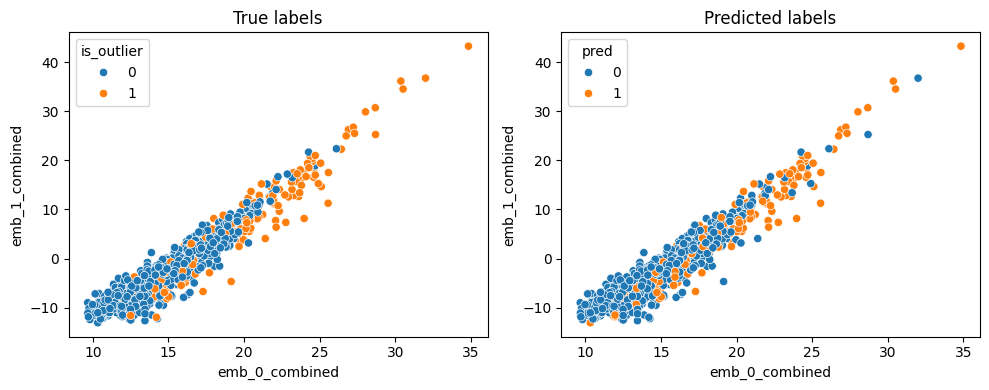

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()

/home/quak/miniconda3/envs/neext/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


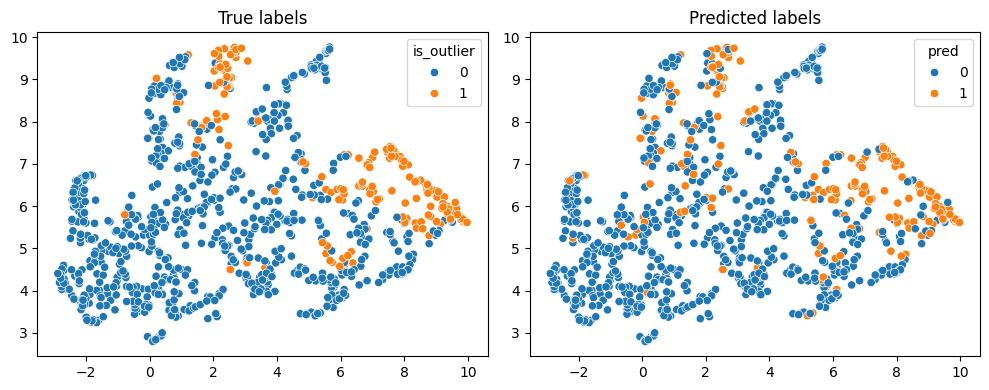

In [9]:
import umap

reduced = umap.UMAP().fit_transform(embeddings.embeddings_df.iloc[:, 1:])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()

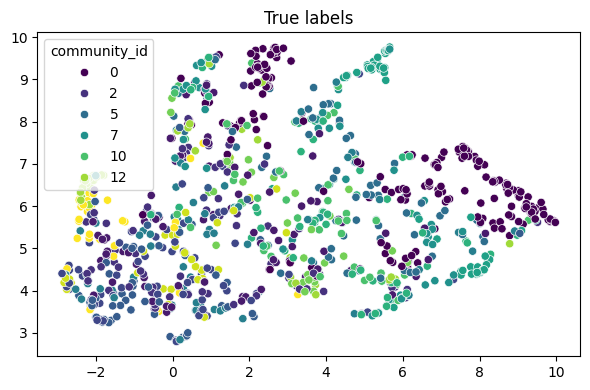

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=features_df["community_id"], ax=ax, palette='viridis')
ax.set_title("True labels")

fig.tight_layout()